## RQ1

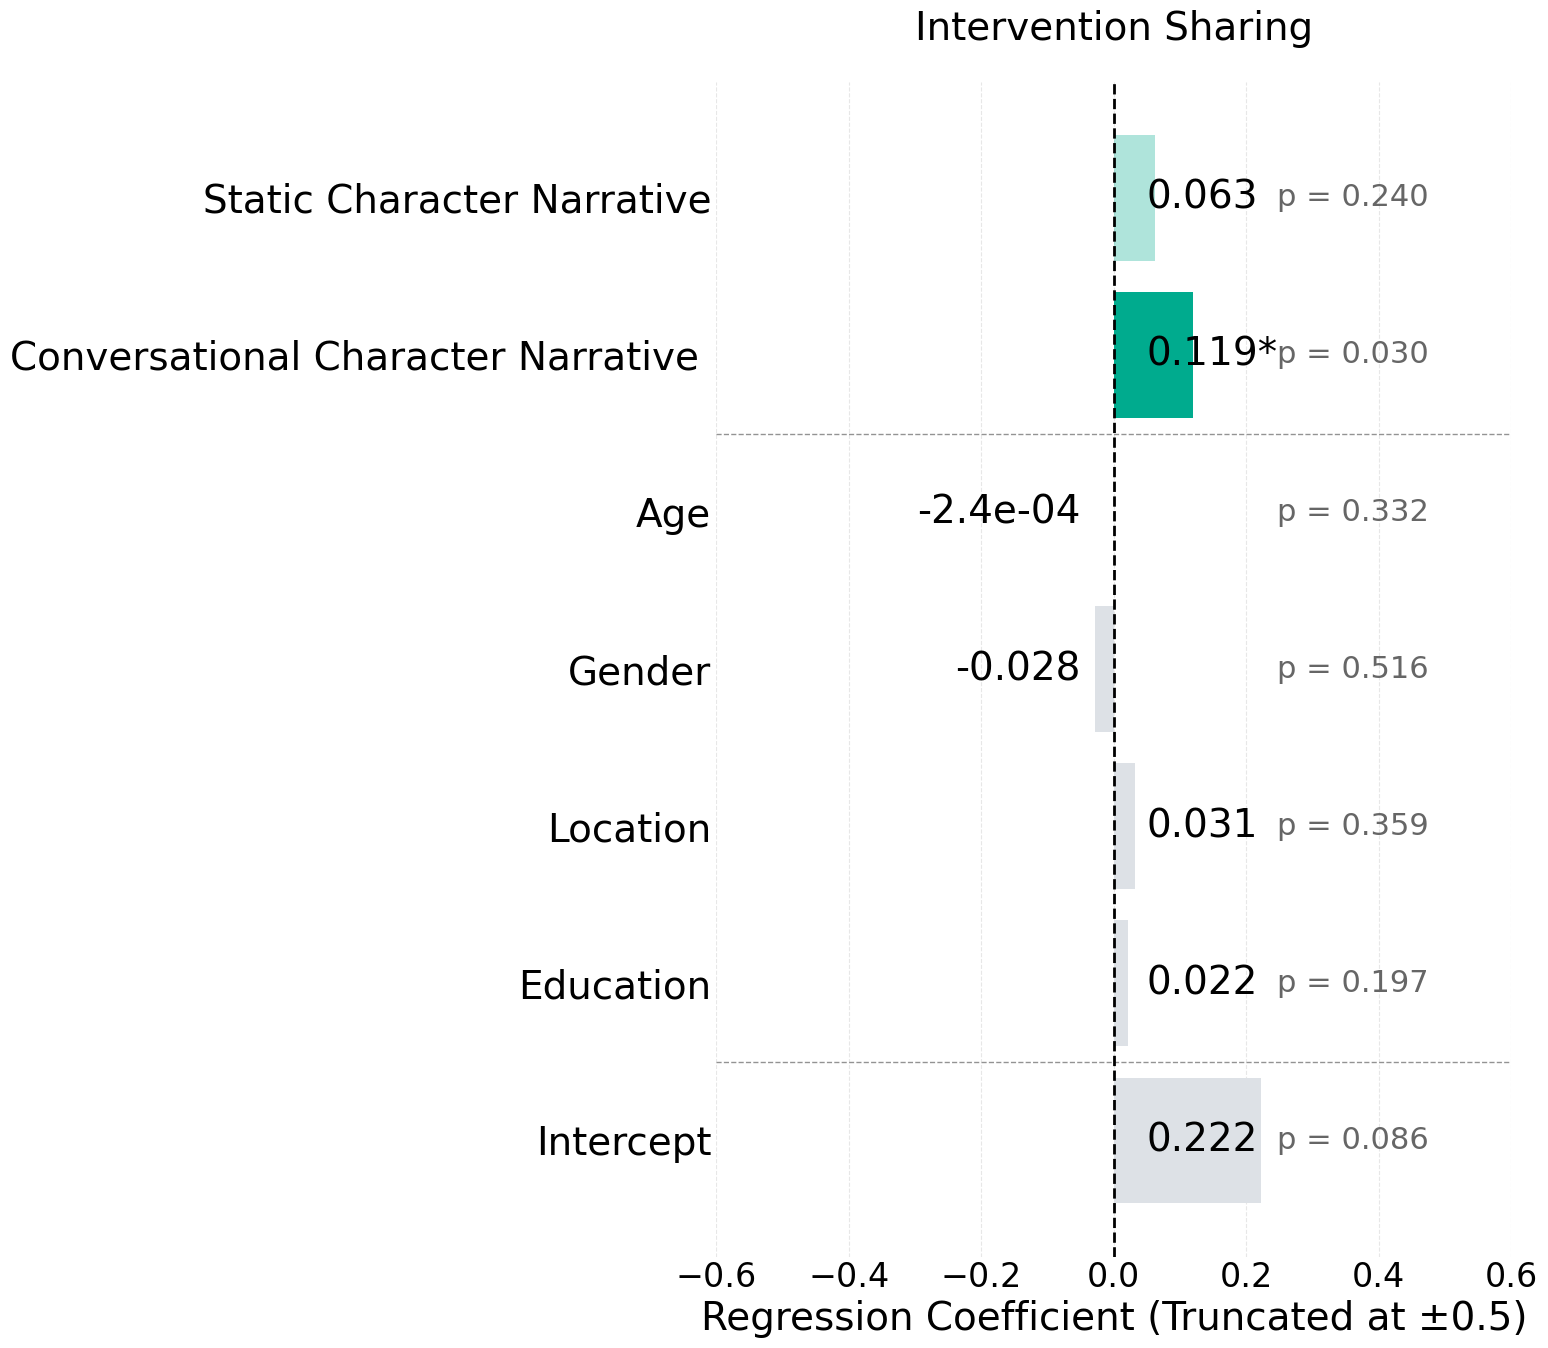

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ======== DATASET DEFINITIONS ========
datasets = {
   "Climate Change Belief Predictors": [
        ("Static Character Narrative", 1.032976, 0.077, "#00AB8E50"),
        ("Conversational Character Narrative ", 1.465923, 0.012, "#00AB8E"),
        ("Climate Change Belief (pre)", 0.9852152, 0.000, "#dde1e6"),
        ("Age", 0.0035466, 0.288, "#dde1e6"),
        ("Gender", 1.105402, 0.019, "#dde1e6"),
        ("Education", -0.0578324, 0.751, "#dde1e6"),
        ("Location", -0.0544499, 0.884, "#dde1e6"),
        ("Intercept", 0.9394024, 0.508, "#dde1e6")
    ],
    "Psychological Distance Predictors": [
        ("Static Character Narrative", 0.057358, 0.220, "#00AB8E50"),
        ("Conversational Character Narrative ", 0.0132234, 0.777, "#00AB8E"),
        ("Psychological Distance (pre)", 0.9019042, 0.000, "#dde1e6"),
        ("Age", 0.0005558, 0.038, "#dde1e6"),
        ("Gender", 0.0539178, 0.152, "#dde1e6"),
        ("Education", 0.0082936, 0.570, "#dde1e6"),
        ("Location", 0.0775717, 0.009, "#dde1e6"),
        ("Intercept", 0.1263325, 0.374, "#dde1e6")
    ],
    "Policy Adoption Predictors": [
        ("Static Character Narrative", 0.005231, 0.991, "#00AB8E50"),
        ("Conversational Character Narrative ", 0.5242997, 0.267, "#00AB8E"),
        ("Policy Adoption (pre)", 0.9939856, 0.000, "#dde1e6"),
        ("Age", 0.0090141, 0.001, "#dde1e6"),
        ("Gender", 0.4000457, 0.294, "#dde1e6"),
        ("Education", -0.0258444, 0.861, "#dde1e6"),
        ("Location", 0.4922884, 0.102, "#dde1e6"),
        ("Intercept", -0.4506161, 0.706, "#dde1e6")
    ],
    "Self Perceived Behavior Predictors": [
        ("Static Character Narrative", -0.0166755, 0.297, "#00AB8E50"),
        ("Conversational Character Narrative ", -0.0036994, 0.817, "#00AB8E"),
        ("Self Perceived Behavior (pre)", 0.995115, 0.000, "#dde1e6"),
        ("Age", -2.23e-06, 0.981, "#dde1e6"),
        ("Gender", 0.0180736, 0.161, "#dde1e6"),
        ("Education", 0.0016337, 0.743, "#dde1e6"),
        ("Location", -0.0032852, 0.745, "#dde1e6"),
        ("Intercept", -0.005674, 0.889, "#dde1e6")
    ],
    "Pro-Environmental Intentions": [
        ("Static Character Narrative", 0.0777147, 0.070, "#00AB8E50"),
        ("Conversational Character Narrative ", 0.1805223, 0.000, "#00AB8E"),
        ("Intentions (pre)", 0.9093843, 0.000, "#dde1e6"),
        ("Age", 0.0003259, 0.186, "#dde1e6"),
        ("Gender", 0.0433021, 0.210, "#dde1e6"),
        ("Education", -0.0149452, 0.264, "#dde1e6"),
        ("Location", 0.0052588, 0.847, "#dde1e6"),
        ("Intercept", 0.2756214, 0.013, "#dde1e6")
    ],
    "Sustainable Consumption": [
        ("Static Character Narrative", 0.0134791, 0.730, "#00AB8E50"),
        ("Conversational Character Narrative ", 0.1044619, 0.008, "#00AB8E"),
        ("Consumption (pre)", 0.9720086, 0.000, "#dde1e6"),
        ("Age", 0.0005803, 0.010, "#dde1e6"),
        ("Gender", 0.060888, 0.053, "#dde1e6"),
        ("Education", 0.0011698, 0.924, "#dde1e6"),
        ("Location", 0.0419745, 0.091, "#dde1e6"),
        ("Intercept", 0.0653719, 0.517, "#dde1e6")
    ],
    "Willingness to Share Information": [
        ("Static Character Narrative", 0.006218, 0.767, "#00AB8E50"),
        ("Conversational Character Narrative ", -0.0019173, 0.927, "#00AB8E"),
        ("Willingness to Share (pre)", 0.9035643, 0.000, "#dde1e6"),
        ("Age", -0.0000252, 0.823, "#dde1e6"),
        ("Gender", 0.036504, 0.031, "#dde1e6"),
        ("Education", -0.0101984, 0.125, "#dde1e6"),
        ("Location", 0.0062767, 0.642, "#dde1e6"),
        ("Intercept", 0.0458886, 0.349, "#dde1e6")
    ],
        "Sustainable Choice Preferences": [
            ("Static Character Narrative", 0.313088, 0.059, "#00AB8E50"),
            ("Conversational Character Narrative ", 0.3878447, 0.019, "#00AB8E"),
            ("Age", 0.0001736, 0.855, "#dde1e6"),
            ("Gender", 0.3582971, 0.007, "#dde1e6"),
            ("Location", 0.2609273, 0.013, "#dde1e6"),
            ("Education", -0.0240924, 0.641, "#dde1e6"),
            ("Intercept", 1.398689, 0.000, "#dde1e6")
        ],
        "Intervention Sharing": [
            ("Static Character Narrative", 0.0627412, 0.240, "#00AB8E50"),
            ("Conversational Character Narrative ", 0.1188705, 0.030, "#00AB8E"),
            ("Age", -0.0002402, 0.332, "#dde1e6"),
            ("Gender", -0.0280083, 0.516, "#dde1e6"),
            ("Location", 0.0313959, 0.359, "#dde1e6"),
            ("Education", 0.0220259, 0.197, "#dde1e6"),
            ("Intercept", 0.221606, 0.086, "#dde1e6")
        ],
    
}


# ======== PLOTTING FUNCTION ========
def create_coefficient_plot(data, title, truncate_threshold=0.5):
    # Data Preparation
    df = pd.DataFrame(data, columns=["Variable", "Coefficient", "p_value", "Color"])
    df = df.iloc[::-1].reset_index(drop=True)  # Reverse order
    
    # Coefficient Truncation
    df["Coefficient_Truncated"] = np.where(
        abs(df["Coefficient"]) > truncate_threshold,
        np.sign(df["Coefficient"]) * truncate_threshold,
        df["Coefficient"]
    )
    
    # Plot Setup
    plt.rcParams.update({'font.size': 24})
    fig, ax = plt.subplots(figsize=(16, 14))
    y_pos = np.arange(len(df))
    bar_height = 0.8

    # Plot Bars
    bars = ax.barh(y_pos, df["Coefficient_Truncated"], height=bar_height, 
                   color=df["Color"], edgecolor='none', zorder=2)
    
    # Annotations
    for i, (coef, trunc_coef, p, var) in enumerate(zip(df["Coefficient"], 
                                                     df["Coefficient_Truncated"], 
                                                     df["p_value"], 
                                                     df["Variable"])):
        if not np.isnan(coef):
            # Effect Size Annotation
            if coef > 0:
                effect_x = 0.05
                ha = "left"
            else:
                effect_x = -0.05
                ha = "right"
            
            # Determine significance marker
            significance_marker = "*" if p < 0.05 else ""

            ax.text(effect_x, i, 
                f"{coef:.3f}{significance_marker}" if abs(coef) >= 0.001 else f"{coef:.1e}{significance_marker}",
                va="center", ha=ha, color="black", fontsize=28)

            # p-value Annotation
            p_text = "p < 0.001" if p < 0.001 else f"p = {p:.3f}"
            ax.text(truncate_threshold * 0.95, i, 
                    p_text, va="center", ha="right", color="#666666", fontsize=22)
    
    # Formatting
    ax.set_yticks(y_pos)
    ax.set_yticklabels(df["Variable"], fontsize=28)
    ax.set_xlim(-truncate_threshold - 0.1, truncate_threshold + 0.1)
    ax.axvline(0, color="black", linestyle="--", linewidth=2)
    ax.set_xlabel("Regression Coefficient (Truncated at ±0.5)", fontsize=28)
    ax.set_title(title, fontsize=28, pad=30)
    
    # Add thin dividers
    ax.axhline(y=0.5, color='#666666', linestyle='--', linewidth=1, zorder=1, alpha=0.7)  # After first 2 vars
    ax.axhline(y=4.5, color='#666666', linestyle='--', linewidth=1, zorder=1, alpha=0.7)  # After first 2 vars 
    # ax.axhline(y=5.5, color='#666666', linestyle='--', linewidth=1, zorder=1, alpha=0.7)  # After first 2 vars

    # Cleanup
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.tick_params(axis='both', which='both', length=0)
    plt.grid(axis="x", linestyle="--", alpha=0.3)
    plt.tight_layout()
    
    return fig

# ======== GENERATE ALL PLOTS ========
for plot_title, plot_data in datasets.items():
    fig = create_coefficient_plot(
        data=plot_data,
        title=plot_title,  # Use dictionary key as title
        truncate_threshold=0.5
    )
    plt.show()

## RQ2.2

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ======== DATASET DEFINITIONS ========
datasets = {
  "Climate Change Belief Predictors": [
        ("Conversational Character Narrative", 1.286456, 0.050, "#00AB8E"),
        ("Static Character Narrative", 0.5063533, 0.359, "#00AB8E50"),
        ("Jellyfish", 0.6733267, 0.244, "#dde1e6"),
        ("Seahorse", 0.782763, 0.157, "#dde1e6"),
        ("Climate Change Belief (pre)", 0.9346062, 0.000, "#dde1e6"),
        ("Age", 0.0032371, 0.824, "#dde1e6"),
        ("Gender", 0.7714721, 0.082, "#dde1e6"),
        ("Education", -0.0874011, 0.640, "#dde1e6"),
        ("Location", 0.0938268, 0.812, "#dde1e6"),
        ("Perceived Anthropomorphism", 0.0416685, 0.866, "#dde1e6"),
        ("Perceived Animacy", -0.2858059, 0.290, "#dde1e6"),
        ("Perceived Likeability", 0.7834641, 0.026, "#dde1e6"),
        ("Perceived Intelligence", -0.3030901, 0.319, "#dde1e6"),
        ("Perceived Safety", -0.2479195, 0.463, "#dde1e6"),
        ("Empathy with the Animal", 0.234027, 0.453, "#dde1e6"),
        ("Climate Impact on Animal", 2.02311, 0.000, "#dde1e6"),
        ("Intercept", -4.981371, 0.017, "#dde1e6")
    ],
    "Self Reported Behavior Predictors": [
        ("Conversational Character Narrative", -0.0061032, 0.741, "#00AB8E"),
        ("Static Character Narrative", -0.0228917, 0.197, "#00AB8E50"),
        ("Jellyfish", 0.0250081, 0.100, "#dde1e6"),
        ("Seahorse", 0.0261712, 0.144, "#dde1e6"),
        ("Self Reported Behavior (pre)", 0.9961001, 0.000, "#dde1e6"),
        ("Age", -0.00000508, 0.988, "#dde1e6"),
        ("Gender", 0.0146896, 0.226, "#dde1e6"),
        ("Education", 0.0015276, 0.784, "#dde1e6"),
        ("Location", -0.0034691, 0.689, "#dde1e6"),
        ("Perceived Anthropomorphism", -0.0031283, 0.554, "#dde1e6"),
        ("Perceived Animacy", -0.0054661, 0.415, "#dde1e6"),
        ("Perceived Likeability", 0.0182252, 0.064, "#dde1e6"),
        ("Perceived Intelligence", -0.0008127, 0.913, "#dde1e6"),
        ("Perceived Safety", -0.0014707, 0.817, "#dde1e6"),
        ("Empathy with the Animal", -0.0074533, 0.426, "#dde1e6"),
        ("Climate Impact on Animal", 0.0118099, 0.217, "#dde1e6"),
        ("Intercept", -0.0700809, 0.243, "#dde1e6")
    ],
    "Policy Adoption Predictors": [
        ("Conversational Character Narrative", 0.3151117, 0.535, "#00AB8E"),
        ("Static Character Narrative", -0.3790305, 0.394, "#00AB8E50"),
        ("Jellyfish", 0.0058396, 0.888, "#dde1e6"),
        ("Seahorse", 0.3786524, 0.402, "#dde1e6"),
        ("Policy Adoption (pre)", 0.9605537, 0.000, "#dde1e6"),
        ("Age", 0.0085123, 0.715, "#dde1e6"),
        ("Gender", 0.0956617, 0.792, "#dde1e6"),
        ("Education", -0.0562205, 0.723, "#dde1e6"),
        ("Location", 0.4875158, 0.117, "#dde1e6"),
        ("Perceived Anthropomorphism", 0.0986661, 0.660, "#dde1e6"),
        ("Perceived Animacy", -0.1706554, 0.541, "#dde1e6"),
        ("Perceived Likeability", 0.1072989, 0.720, "#dde1e6"),
        ("Perceived Intelligence", 0.055315, 0.828, "#dde1e6"),
        ("Perceived Safety", 0.1827256, 0.489, "#dde1e6"),
        ("Empathy with the Animal", 0.4411435, 0.131, "#dde1e6"),
        ("Climate Impact on Animal", 0.9396416, 0.002, "#dde1e6"),
        ("Intercept", -3.974965, 0.044, "#dde1e6")
    ],
    "Distance Predictors": [
        ("Conversational Character Narrative", 0.019614, 0.717, "#00AB8E"),
        ("Static Character Narrative", 0.0642599, 0.164, "#00AB8E50"),
        ("Jellyfish", 0.0547086, 0.253, "#dde1e6"),
        ("Seahorse", 0.0059387, 0.899, "#dde1e6"),
        ("Distance (pre)", 0.8610991, 0.000, "#dde1e6"),
        ("Age", 0.0005221, 0.819, "#dde1e6"),
        ("Gender", 0.0337313, 0.347, "#dde1e6"),
        ("Education", 0.007369, 0.607, "#dde1e6"),
        ("Location", 0.0656194, 0.021, "#dde1e6"),
        ("Perceived Anthropomorphism", -0.0335086, 0.122, "#dde1e6"),
        ("Perceived Animacy", -0.0304099, 0.253, "#dde1e6"),
        ("Perceived Likeability", -0.0270156, 0.398, "#dde1e6"),
        ("Perceived Intelligence", 0.002452, 0.931, "#dde1e6"),
        ("Perceived Safety", 0.0186346, 0.426, "#dde1e6"),
        ("Empathy with the Animal", 0.0965611, 0.001, "#dde1e6"),
        ("Climate Impact on Animal", 0.1492471, 0.390, "#dde1e6"),
        ("Intercept", 0.1492471, 0.390, "#dde1e6")
    ],
    "Intervention Sharing Predictors": [
        ("Conversational Character Narrative", 0.0591423, 0.324, "#00AB8E"),
        ("Static Character Narrative", 0.0016412, 0.977, "#00AB8E50"),
        ("Jellyfish", -0.0070126, 0.896, "#dde1e6"),
        ("Seahorse", -0.0654652, 0.219, "#dde1e6"),
        ("Age", -0.0001356, 0.906, "#dde1e6"),
        ("Gender", -0.0339987, 0.429, "#dde1e6"),
        ("Education", 0.0192986, 0.265, "#dde1e6"),
        ("Location", 0.0295524, 0.403, "#dde1e6"),
        ("Perceived Anthropomorphism", 0.0245492, 0.318, "#dde1e6"),
        ("Perceived Animacy", 0.0494994, 0.098, "#dde1e6"),
        ("Perceived Likeability", 0.0075062, 0.827, "#dde1e6"),
        ("Perceived Intelligence", 0.0476608, 0.148, "#dde1e6"),
        ("Perceived Safety", -0.0020644, 0.939, "#dde1e6"),
        ("Empathy with the Animal", 0.0652439, 0.041, "#dde1e6"),
        ("Climate Impact on Animal", -0.0182511, 0.563, "#dde1e6"),
        ("Intercept", -0.3955885, 0.069, "#dde1e6")
    ],
    "Sustainable Choice Predictors": [
        ("Conversational Character Narrative", 0.3419775, 0.031, "#00AB8E"),
        ("Static Character Narrative", 0.1148419, 0.434, "#00AB8E50"),
        ("Jellyfish", 0.0850732, 0.596, "#dde1e6"),
        ("Seahorse", -0.025055, 0.862, "#dde1e6"),
        ("Age", 0.0004049, 0.905, "#dde1e6"),
        ("Gender", 0.1823201, 0.132, "#dde1e6"),
        ("Education", -0.0586166, 0.226, "#dde1e6"),
        ("Location", 0.224238, 0.029, "#dde1e6"),
        ("Perceived Anthropomorphism", 0.1735037, 0.007, "#dde1e6"),
        ("Perceived Animacy", 0.1422571, 0.075, "#dde1e6"),
        ("Perceived Likeability", 0.1026774, 0.180, "#dde1e6"),
        ("Perceived Intelligence", -0.0352113, 0.663, "#dde1e6"),
        ("Perceived Safety", -0.056529, 0.451, "#dde1e6"),
        ("Empathy with the Animal", 0.4038669, 0.000, "#dde1e6"),
        ("Climate Impact on Animal", 0.2549391, 0.001, "#dde1e6"),
        ("Intercept", -2.176014, 0.000, "#dde1e6")
    ],
    "Pro Environmental Intentions Predictors": [
        ("Conversational Character Narrative", 0.1728353, 0.000, "#00AB8E"),
        ("Static Character Narrative", 0.0391713, 0.315, "#00AB8E50"),
        ("Jellyfish", -0.0026957, 0.952, "#dde1e6"),
        ("Seahorse", 0.0112443, 0.781, "#dde1e6"),
        ("Intentions (pre)", 0.8746857, 0.000, "#dde1e6"),
        ("Age", 0.0003261, 0.831, "#dde1e6"),
        ("Gender", 0.0222466, 0.531, "#dde1e6"),
        ("Education", -0.0177665, 0.175, "#dde1e6"),
        ("Location", 0.0121539, 0.663, "#dde1e6"),
        ("Perceived Anthropomorphism", 0.0076469, 0.684, "#dde1e6"),
        ("Perceived Animacy", 0.0359, 0.069, "#dde1e6"),
        ("Perceived Likeability", 0.0591635, 0.012, "#dde1e6"),
        ("Perceived Intelligence", -0.0032415, 0.887, "#dde1e6"),
        ("Perceived Safety", 0.0031937, 0.895, "#dde1e6"),
        ("Empathy with the Animal", 0.0154695, 0.480, "#dde1e6"),
        ("Climate Impact on Animal", 0.0441548, 0.009, "#dde1e6"),
        ("Intercept", -0.2744474, 0.102, "#dde1e6")
    ],
    "Sustainable Consumption Predictors": [
        ("Conversational Character Narrative", 0.0770372, 0.079, "#00AB8E"),
        ("Static Character Narrative", -0.0222538, 0.578, "#00AB8E50"),
        ("Jellyfish", 0.0545574, 0.143, "#dde1e6"),
        ("Seahorse", 0.0535784, 0.161, "#dde1e6"),
        ("Consumption (pre)", 0.9255603, 0.000, "#dde1e6"),
        ("Age", 0.0005169, 0.769, "#dde1e6"),
        ("Gender", 0.030605, 0.318, "#dde1e6"),
        ("Education", 0.0005125, 0.966, "#dde1e6"),
        ("Location", 0.0418315, 0.113, "#dde1e6"),
        ("Perceived Anthropomorphism", 0.0361848, 0.041, "#dde1e6"),
        ("Perceived Animacy", -0.0151951, 0.434, "#dde1e6"),
        ("Perceived Likeability", -0.0026194, 0.915, "#dde1e6"),
        ("Perceived Intelligence", 0.0434244, 0.082, "#dde1e6"),
        ("Perceived Safety", -0.0255692, 0.231, "#dde1e6"),
        ("Empathy with the Animal", 0.0388343, 0.113, "#dde1e6"),
        ("Climate Impact on Animal", 0.0688514, 0.007, "#dde1e6"),
        ("Intercept", -0.2674584, 0.082, "#dde1e6")
    ],
    "Willingness to Share Predictors": [
        ("Conversational Character Narrative", 0.0097462, 0.626, "#00AB8E"),
        ("Static Character Narrative", 0.0049264, 0.830, "#00AB8E50"),
        ("Jellyfish", 0.0076469, 0.671, "#dde1e6"),
        ("Seahorse", 0.0155964, 0.474, "#dde1e6"),
        ("Willingness to Share (pre)", 0.8804912, 0.000, "#dde1e6"),
        ("Age", -0.0000297, 0.933, "#dde1e6"),
        ("Gender", 0.025664, 0.095, "#dde1e6"),
        ("Education", -0.0099245, 0.125, "#dde1e6"),
        ("Location", 0.0078847, 0.545, "#dde1e6"),
        ("Perceived Anthropomorphism", -0.0203522, 0.072, "#dde1e6"),
        ("Perceived Animacy", 0.0251353, 0.017, "#dde1e6"),
        ("Perceived Likeability", 0.0235249, 0.123, "#dde1e6"),
        ("Perceived Intelligence", -0.0040335, 0.768, "#dde1e6"),
        ("Perceived Safety", -0.0123731, 0.234, "#dde1e6"),
        ("Empathy with the Animal", 0.0073649, 0.520, "#dde1e6"),
        ("Climate Impact on Animal", 0.0228534, 0.005, "#dde1e6"),
        ("Intercept", -0.1394995, 0.026, "#dde1e6")
    ],
    "Perceived Animal Attributes Predictors": [
        ("Perceived Anthropomorphism", np.nan, np.nan, "#f2f4f8"),
        ("Beluga", -0.440613, 0.000, "#dde1e6"),
        ("Seahorse", -0.4559387, 0.000, "#dde1e6"),
        ("Intercept", 3.831418, 0.000, "#dde1e6"),
        
        ("Perceived Animacy", np.nan, np.nan, "#f2f4f8"),
        ("Beluga", -0.1724138, 0.037, "#dde1e6"),
        ("Seahorse", -0.2337165, 0.005, "#dde1e6"),
        ("Intercept", 4.137931, 0.000, "#dde1e6"),
        
        ("Perceived Likeability", np.nan, np.nan, "#f2f4f8"),
        ("Beluga", 0.3601533, 0.000, "#dde1e6"),
        ("Seahorse", 0.1532567, 0.075, "#dde1e6"),
        ("Intercept", 4.007663, 0.000, "#dde1e6"),
        
        ("Perceived Intelligence", np.nan, np.nan, "#f2f4f8"),
        ("Beluga", 0.2796935, 0.001, "#dde1e6"),
        ("Seahorse", -0.0670498, 0.474, "#dde1e6"),
        ("Intercept", 3.850575, 0.000, "#dde1e6"),
        
        ("Perceived Safety", np.nan, np.nan, "#f2f4f8"),
        ("Beluga", 0.1685824, 0.020, "#dde1e6"),
        ("Seahorse", -0.1455939, 0.061, "#dde1e6"),
        ("Intercept", 3.10728, 0.000, "#dde1e6"),
        
        ("Empathy with the Animal", np.nan, np.nan, "#f2f4f8"),
        ("Beluga", 0.183908, 0.040, "#dde1e6"),
        ("Seahorse", -0.0613027, 0.544, "#dde1e6"),
        ("Intercept", 3.950192, 0.000, "#dde1e6"),
        
        ("Climate Impact on Animal", np.nan, np.nan, "#f2f4f8"),
        ("Beluga", -0.1034483, 0.206, "#dde1e6"),
        ("Seahorse", -0.2337165, 0.007, "#dde1e6"),
        ("Intercept", 4.448276, 0.000, "#dde1e6")
    ],
    "Experimental Condition Predictors": [
        ("Perceived Anthropomorphism", np.nan, np.nan, "#f2f4f8"),
        ("Conversational Character Narrative", 0.2758621, 0.003, "#00AB8E"),
        ("Static Character Narrative", 0.3908046, 0.000, "#00AB8E50"),
        ("Intercept", 3.310345, 0.000, "#dde1e6"),
        
        ("Perceived Animacy", np.nan, np.nan, "#f2f4f8"),
        ("Conversational Character Narrative", -0.2222222, 0.010, "#00AB8E"),
        ("Static Character Narrative", -0.0172414, 0.825, "#00AB8E50"),
        ("Intercept", 4.082375, 0.000, "#dde1e6"),
        
        ("Perceived Likeability", np.nan, np.nan, "#f2f4f8"),
        ("Conversational Character Narrative", 0.2452107, 0.007, "#00AB8E"),
        ("Static Character Narrative", 0.4750958, 0.000, "#00AB8E50"),
        ("Intercept", 3.938697, 0.000, "#dde1e6"),
        
        ("Perceived Intelligence", np.nan, np.nan, "#f2f4f8"),
        ("Conversational Character Narrative", 0.5747126, 0.000, "#00AB8E"),
        ("Static Character Narrative", 0.5, 0.000, "#00AB8E50"),
        ("Intercept", 3.563218, 0.000, "#dde1e6"),
        
        ("Perceived Safety", np.nan, np.nan, "#f2f4f8"),
        ("Conversational Character Narrative", 0.3639847, 0.000, "#00AB8E"),
        ("Static Character Narrative", 0.3601533, 0.000, "#00AB8E50"),
        ("Intercept", 2.873563, 0.000, "#dde1e6"),
        
        ("Empathy with the Animal", np.nan, np.nan, "#f2f4f8"),
        ("Conversational Character Narrative", 0.1072797, 0.268, "#00AB8E"),
        ("Static Character Narrative", 0.2452107, 0.008, "#00AB8E50"),
        ("Intercept", 3.873563, 0.000, "#dde1e6"),
        
        ("Climate Impact on Animal", np.nan, np.nan, "#f2f4f8"),
        ("Conversational Character Narrative", -0.0498084, 0.585, "#00AB8E"),
        ("Static Character Narrative", 0.1149425, 0.175, "#00AB8E50"),
        ("Intercept", 4.314176, 0.000, "#dde1e6")
    ]
}


# ======== PLOTTING FUNCTION ========
def create_coefficient_plot(data, title, truncate_threshold=0.5):
    # Data Preparation
    df = pd.DataFrame(data, columns=["Variable", "Coefficient", "p_value", "Color"])
    df = df.iloc[::-1].reset_index(drop=True)  # Reverse order
    
    # Coefficient Truncation
    df["Coefficient_Truncated"] = np.where(
        abs(df["Coefficient"]) > truncate_threshold,
        np.sign(df["Coefficient"]) * truncate_threshold,
        df["Coefficient"]
    )
    
    # Plot Setup
    plt.rcParams.update({'font.size': 24})
    fig, ax = plt.subplots(figsize=(16, 14))
    y_pos = np.arange(len(df))
    bar_height = 0.8

    # Plot Bars
    bars = ax.barh(y_pos, df["Coefficient_Truncated"], height=bar_height, 
                   color=df["Color"], edgecolor='none', zorder=2)
    
    # Annotations
    for i, (coef, trunc_coef, p, var) in enumerate(zip(df["Coefficient"], 
                                                     df["Coefficient_Truncated"], 
                                                     df["p_value"], 
                                                     df["Variable"])):
        if not np.isnan(coef):
            # Effect Size Annotation
            if coef > 0:
                effect_x = 0.05
                ha = "left"
            else:
                effect_x = -0.05
                ha = "right"
            
            # Determine significance marker
            significance_marker = "*" if p < 0.05 else ""

            ax.text(effect_x, i, 
                f"{coef:.3f}{significance_marker}" if abs(coef) >= 0.001 else f"{coef:.1e}{significance_marker}",
                va="center", ha=ha, color="black", fontsize=24)

            # p-value Annotation
            p_text = "p < 0.001" if p < 0.001 else f"p = {p:.3f}"
            ax.text(truncate_threshold * 0.95, i, 
                    p_text, va="center", ha="right", color="#666666", fontsize=24)
    
    # Formatting
    ax.set_yticks(y_pos)
    ax.set_yticklabels(df["Variable"], fontsize=24)
    ax.set_xlim(-truncate_threshold - 0.1, truncate_threshold + 0.1)
    ax.axvline(0, color="black", linestyle="--", linewidth=2)
    ax.set_xlabel("Regression Coefficient (Truncated at ±0.5)", fontsize=24)
    ax.set_title(title, fontsize=28, pad=30)
    
    # Add thin dividers
    # ax.axhline(y=7.5, color='#666666', linestyle='--', linewidth=1, zorder=1, alpha=0.7)  # After first 2 vars
    # # ax.axhline(y=11.5, color='#666666', linestyle='--', linewidth=1, zorder=1, alpha=0.7)  # After first 2 vars
    # ax.axhline(y=11.5, color='#666666', linestyle='--', linewidth=1, zorder=1, alpha=0.7)  # After first 2 vars
    # ax.axhline(y=13.5, color='#666666', linestyle='--', linewidth=1, zorder=1, alpha=0.7)  # After fifth var
    
    ax.axhline(y=3.5, color='#666666', linestyle='--', linewidth=1, zorder=1, alpha=0.7)  # After first 2 vars
    ax.axhline(y=7.5, color='#666666', linestyle='--', linewidth=1, zorder=1, alpha=0.7)  # After first 2 vars
    ax.axhline(y=11.5, color='#666666', linestyle='--', linewidth=1, zorder=1, alpha=0.7)  # After first 2 vars
    ax.axhline(y=15.5, color='#666666', linestyle='--', linewidth=1, zorder=1, alpha=0.7)  # After first 2 vars
    ax.axhline(y=19.5, color='#666666', linestyle='--', linewidth=1, zorder=1, alpha=0.7)  # After first 2 vars
    ax.axhline(y=23.5, color='#666666', linestyle='--', linewidth=1, zorder=1, alpha=0.7)  # After first 2 vars

    # Cleanup
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.tick_params(axis='both', which='both', length=0)
    plt.grid(axis="x", linestyle="--", alpha=0.3)
    plt.tight_layout()
    
    return fig

# ======== GENERATE ALL PLOTS ========
for plot_title, plot_data in datasets.items():
    fig = create_coefficient_plot(
        data=plot_data,
        title=plot_title,  # Use dictionary key as title
        truncate_threshold=0.5
    )
    plt.show()

## Summary Chart

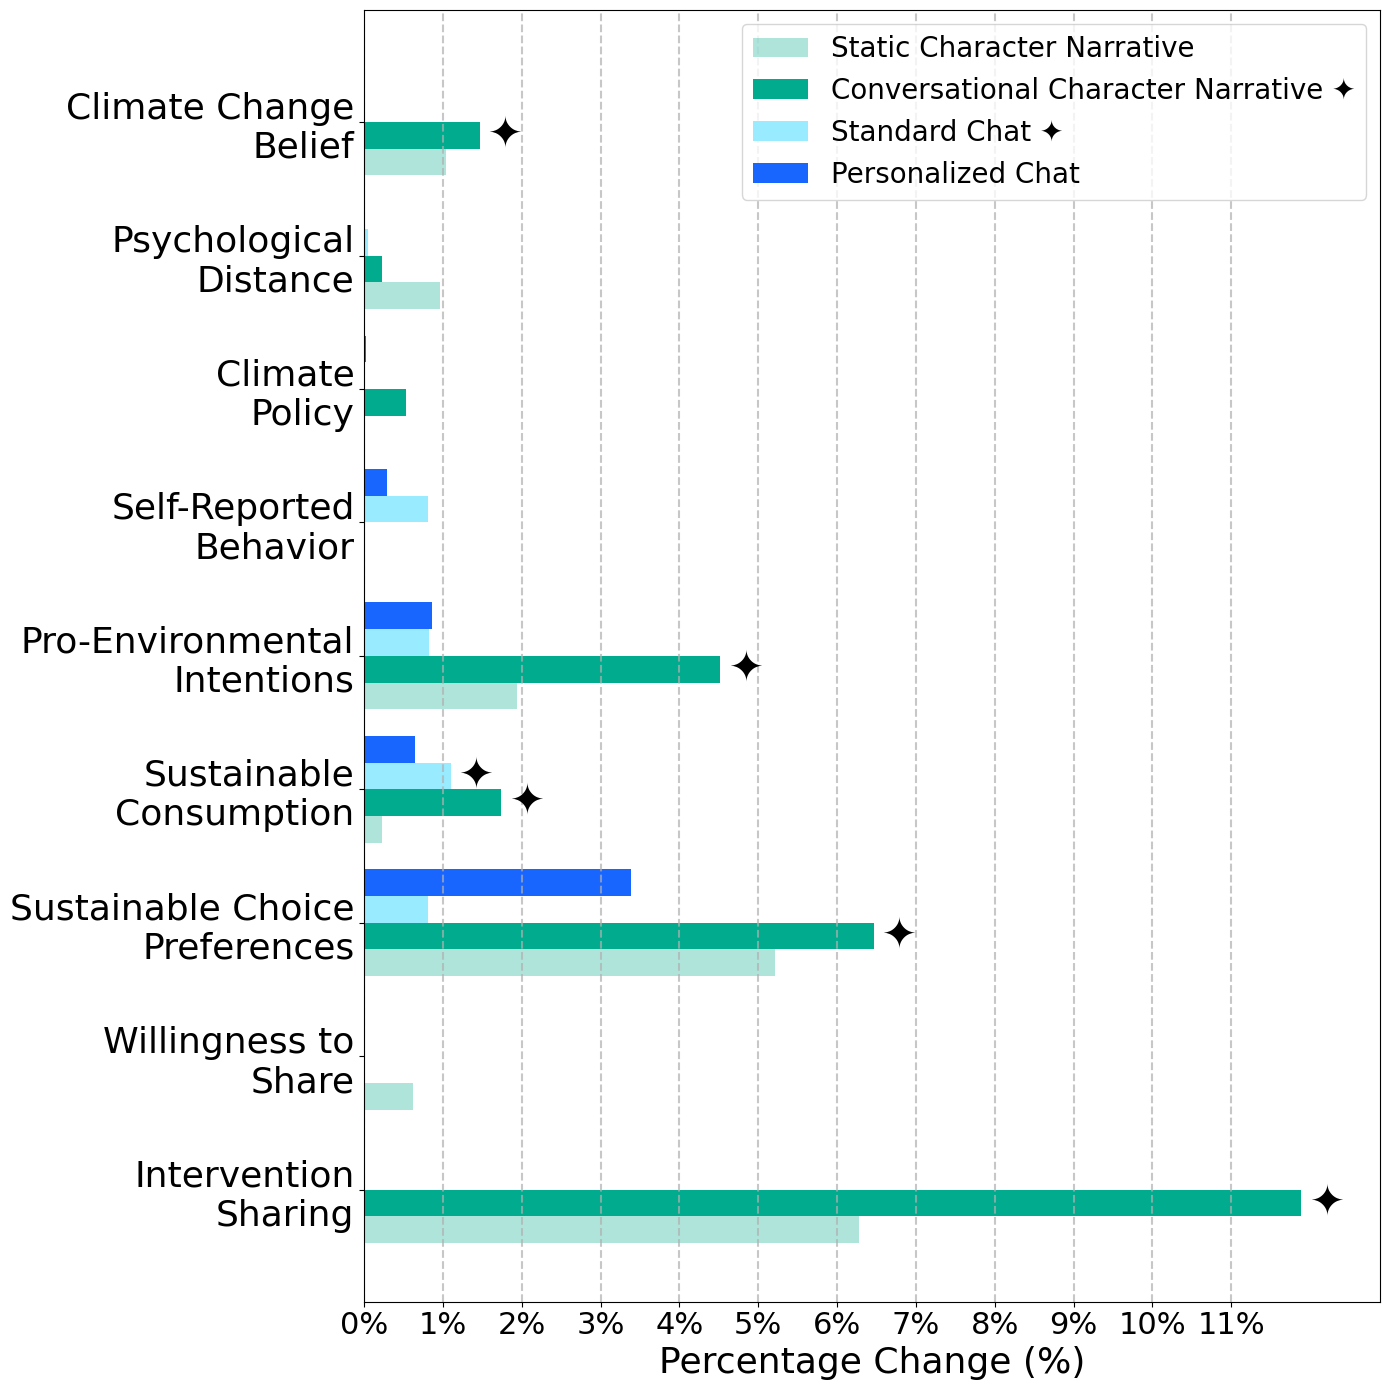

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Updated data using the values from the predictors datasets.
data = {
    "Outcome Variable": [
        "Intervention\nSharing",
        "Willingness to\nShare",
        "Sustainable Choice\nPreferences",
        "Sustainable\nConsumption",
        "Pro-Environmental\nIntentions",
        "Self-Reported\nBehavior",
        "Climate\nPolicy",
        "Psychological\nDistance",
        "Climate Change\nBelief",
    ],
    "Static Character Narrative": [
        0.0627412,     # Intervention Sharing
        0.006218,      # Willingness to Share
        0.313088,      # Sustainable Choice Preferences
        0.0134791,     # Sustainable Consumption
        0.0777147,     # Pro-Environmental Intentions
        -0.0166755,    # Self-Reported Behavior
        0.005231,      # Climate Policy
        0.057358,      # Psychological Distance
        1.032976       # Climate Change Belief
    ],
    "Conversational Character Narrative": [
        0.1188705,     # Intervention Sharing
        -0.0019173,    # Willingness to Share
        0.3878447,     # Sustainable Choice Preferences
        0.1044619,     # Sustainable Consumption
        0.1805223,     # Pro-Environmental Intentions
        -0.0036994,    # Self-Reported Behavior
        0.5242997,     # Climate Policy
        0.0132234,     # Psychological Distance
        1.465923       # Climate Change Belief
    ],
    "Standard Chat": [
        -0.0813926,    # Intervention Sharing
        -0.0045743,    # Willingness to Share
        0.0483541,     # Sustainable Choice Preferences
        0.0659604,     # Sustainable Consumption
        0.0329281,     # Pro-Environmental Intentions
        0.0324319,     # Self-Reported Behavior
        -0.0352266,    # Climate Policy
        0.0027708,     # Psychological Distance
        -0.1977092     # Climate Change Belief
    ],
    "Personalized Chat": [
        -0.0459295,    # Intervention Sharing
        -0.0110557,    # Willingness to Share
        0.203361,      # Sustainable Choice Preferences
        0.03888,       # Sustainable Consumption
        0.0344872,     # Pro-Environmental Intentions
        0.0114069,     # Self-Reported Behavior
        0.0261536,     # Climate Policy
        -0.001855,     # Psychological Distance
        -0.1750725     # Climate Change Belief
    ],
    "Scale Range": [
        1 - 0,        # Intervention Sharing
        1 - 0,        # Willingness to Share
        6 - 0,        # Sustainable Choice Preferences
        7 - 1,        # Sustainable Consumption
        5 - 1,        # Pro-Environmental Intentions
        5 - 1,        # Self-Reported Behavior
        100 - 0,      # Climate Policy
        7 - 1,        # Psychological Distance
        100 - 0       # Climate Change Belief
    ],
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Calculate percentage change for each narrative
df["Static (%)"] = (df["Static Character Narrative"] / df["Scale Range"]) * 100
df["Conversational (%)"] = (df["Conversational Character Narrative"] / df["Scale Range"]) * 100
df["Standard (%)"] = (df["Standard Chat"] / df["Scale Range"]) * 100
df["Personalized (%)"] = (df["Personalized Chat"] / df["Scale Range"]) * 100

# Updated p-values for each outcome and condition (p-values <= 0.05 are considered significant)
sig_dict = {
    0: {  # Intervention Sharing
        "Static": 0.240,
        "Conversational": 0.030,  # significant
        "Standard": 0.098,
        "Personalized": 0.338
    },
    1: {  # Willingness to Share
        "Static": 0.767,
        "Conversational": 0.927,
        "Standard": 0.767,
        "Personalized": 0.475
    },
    2: {  # Sustainable Choice Preferences
        "Static": 0.059,
        "Conversational": 0.019,  # significant
        "Standard": 0.718,
        "Personalized": 0.127
    },
    3: {  # Sustainable Consumption
        "Static": 0.730,
        "Conversational": 0.008,  # significant
        "Standard": 0.034,        # significant
        "Personalized": 0.209
    },
    4: {  # Pro-Environmental Intentions
        "Static": 0.070,
        "Conversational": 0.000,  # significant
        "Standard": 0.264,
        "Personalized": 0.239
    },
    5: {  # Self-Reported Behavior
        "Static": 0.297,
        "Conversational": 0.817,
        "Standard": 0.166,
        "Personalized": 0.624
    },
    6: {  # Climate Policy
        "Static": 0.991,
        "Conversational": 0.267,
        "Standard": 0.928,
        "Personalized": 0.946
    },
    7: {  # Psychological Distance
        "Static": 0.220,
        "Conversational": 0.777,
        "Standard": 0.945,
        "Personalized": 0.963
    },
    8: {  # Climate Change Belief
        "Static": 0.077,
        "Conversational": 0.012,  # significant
        "Standard": 0.686,
        "Personalized": 0.719
    }
}

# Update legend labels based on significance (if any outcome is significant, add an asterisk)
legend_labels = {
    "Static": "Static Character Narrative",
    "Conversational": "Conversational Character Narrative",
    "Standard": "Standard Chat",
    "Personalized": "Personalized Chat"
}

for cond in legend_labels.keys():
    for row in sig_dict.values():
        p_val = row.get(cond)
        if p_val is not None and p_val <= 0.05:
            legend_labels[cond] += " ✦"
            break

# Plotting
fig, ax = plt.subplots(figsize=(14, 14))

# Define bar width for the four conditions per outcome
bar_width = 0.2
x = np.arange(len(df))

# Calculate positions for each set of bars
static_pos = x - 1.5 * bar_width
conv_pos = x - 0.5 * bar_width
standard_pos = x + 0.5 * bar_width
personalized_pos = x + 1.5 * bar_width

# Plot the bars
ax.barh(static_pos, df["Static (%)"], bar_width, label=legend_labels["Static"], color="#00AB8E50")
ax.barh(conv_pos, df["Conversational (%)"], bar_width, label=legend_labels["Conversational"], color="#00AB8E")
ax.barh(standard_pos, df["Standard (%)"], bar_width, label=legend_labels["Standard"], color="#99ebff")
ax.barh(personalized_pos, df["Personalized (%)"], bar_width, label=legend_labels["Personalized"], color="#1966ff")

# Define a constant offset for the asterisk (outside the bar)
offset = 0.1  # Increase this value to place the star further right of the bar

# Annotate bars with an asterisk if significant (p <= 0.05)
for i in range(len(df)):
    # Static
    p_val = sig_dict[i].get("Static")
    if p_val is not None and p_val <= 0.05:
        val = df["Static (%)"].iloc[i]
        ax.text(val + offset, static_pos[i], "✦", va="center", ha="left",
                fontsize=30, color="black")
    # Conversational
    p_val = sig_dict[i].get("Conversational")
    if p_val is not None and p_val <= 0.05:
        val = df["Conversational (%)"].iloc[i]
        ax.text(val + offset, conv_pos[i], "✦", va="center", ha="left",
                fontsize=30, color="black")
    # Standard
    p_val = sig_dict[i].get("Standard")
    if p_val is not None and p_val <= 0.05:
        val = df["Standard (%)"].iloc[i]
        ax.text(val + offset, standard_pos[i], "✦", va="center", ha="left",
                fontsize=30, color="black")
    # Personalized
    p_val = sig_dict[i].get("Personalized")
    if p_val is not None and p_val <= 0.05:
        val = df["Personalized (%)"].iloc[i]
        ax.text(val + offset, personalized_pos[i], "✦", va="center", ha="left",
                fontsize=30, color="black")

# Set the y-ticks to be centered on the groups
ax.set_yticks(x)
ax.set_yticklabels(df["Outcome Variable"], fontsize=26)
ax.set_xlabel("Percentage Change (%)", fontsize=26)

# Customize the x-axis ticks (only positive values)
max_tick = int(max(df["Static (%)"].max(), df["Conversational (%)"].max(),
                   df["Standard (%)"].max(), df["Personalized (%)"].max())) + 1
xticks = np.arange(0, max_tick, 1)
ax.set_xticks(xticks)
ax.set_xticklabels([f"{tick}%" for tick in xticks], fontsize=22)
ax.set_xlim(left=0)

# Make gridlines bolder
ax.grid(axis="x", linestyle="--", linewidth=1.5, alpha=0.7)

ax.legend(loc="upper right", fontsize=20)
plt.tight_layout()
plt.show()

# Plotting vertical bars
fig, ax = plt.subplots(figsize=(15, 5))

# Define bar width for the four conditions per outcome
bar_width = 0.2
x = np.arange(len(df))  # positions for outcome groups

# Calculate positions for each set of bars (shifted along x-axis)
static_pos = x - 1.5 * bar_width
conv_pos = x - 0.5 * bar_width
standard_pos = x + 0.5 * bar_width
personalized_pos = x + 1.5 * bar_width


# Make gridlines bolder
ax.grid(axis="y", linestyle="--", linewidth=2.5, alpha=0.3)

# Plot vertical bars
ax.bar(static_pos, df["Static (%)"], bar_width, label=legend_labels["Static"], color="#00AB8E50")
ax.bar(conv_pos, df["Conversational (%)"], bar_width, label=legend_labels["Conversational"], color="#00AB8E")
ax.bar(standard_pos, df["Standard (%)"], bar_width, label=legend_labels["Standard"], color="#99ebff")
ax.bar(personalized_pos, df["Personalized (%)"], bar_width, label=legend_labels["Personalized"], color="#1966ff")

# Define a constant offset for the asterisk (above the bar)
offset = 0.5  # Adjust as needed

# Annotate bars with an asterisk if significant (p <= 0.05)
for i in range(len(df)):
    # Static
    p_val = sig_dict[i].get("Static")
    if p_val is not None and p_val <= 0.05:
        val = df["Static (%)"].iloc[i]
        ax.text(static_pos[i], val + offset, "✦", ha="center", va="bottom", fontsize=20, color="black")
    # Conversational
    p_val = sig_dict[i].get("Conversational")
    if p_val is not None and p_val <= 0.05:
        val = df["Conversational (%)"].iloc[i]
        ax.text(conv_pos[i], val + offset, "✦", ha="center", va="bottom", fontsize=20, color="black")
    # Standard
    p_val = sig_dict[i].get("Standard")
    if p_val is not None and p_val <= 0.05:
        val = df["Standard (%)"].iloc[i]
        ax.text(standard_pos[i], val + offset, "✦", ha="center", va="bottom", fontsize=20, color="black")
    # Personalized
    p_val = sig_dict[i].get("Personalized")
    if p_val is not None and p_val <= 0.05:
        val = df["Personalized (%)"].iloc[i]
        ax.text(personalized_pos[i], val + offset, "✦", ha="center", va="bottom", fontsize=20, color="black")

# Set x-ticks to be at the center of each group
ax.set_xticks(x)
ax.set_xticklabels(df["Outcome Variable"], fontsize=16, rotation=45, ha="right")
ax.set_ylabel("Percentage Change (%)", fontsize=18)

# Customize y-axis ticks (only positive values)
max_tick = int(max(df["Static (%)"].max(), df["Conversational (%)"].max(),
                   df["Standard (%)"].max(), df["Personalized (%)"].max())) + 1
yticks = np.arange(0, max_tick, 1)
ax.set_yticks(yticks)
ax.set_yticklabels([f"{tick}%" for tick in yticks], fontsize=14)
ax.set_ylim(bottom=0)



ax.legend(loc="upper right", fontsize=14)
plt.tight_layout()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1013c793-54a5-4345-8056-59dcfc0f7c3d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>